# CSC635_HW4_Sujung Choi

Implementation of the Perceptron algorithm

The stopping criteria I used for the implementation of the perceptron algorithm is 1) maximum number of iterations to be 1000 and 2) threshold for error rate to be 0.005 (to stop when it goes below the threshold)

The accuracy I got on the testing data is 100%

In [50]:
import numpy as np
import math

#seed the random number generator
np.random.seed(42)

#load the training dataset
train_data = 'training_data.txt'
train_input = np.loadtxt(train_data)

#assume the last column in the datasets is the class label
train_labels = train_input[:, -1].astype(int)

#extract all the other columns except the last column
train_attributes = train_input[:, :-1]

In [51]:
#load the test dataset
test_data = 'testing_data.txt'
test_input = np.loadtxt(test_data)
test_labels = test_input[:, -1].astype(int)

#extract all the other columns except the last column
test_attributes = test_input[:, :-1]

#total number of test samples
total_test = len(test_attributes)

In [52]:
#formula for the weights w = w + learning_rate * (expected - predicted) * x

#function to train the perceptron
def perceptron(attributes, labels):
    #Initialize weights w and bias b
    w = np.zeros(attributes.shape[1])
    b = 0
    num_errors = len(labels)
    iteration = 0
    while num_errors > threshold * len(labels) and iteration < max_iterations:
        num_errors = 0
        for i in range(len(attributes)):
            prediction = activation_function(attributes[i], w, b)
            if prediction != labels[i]:
                #update the weights if the predicted class is different from actual class
                w += learning_rate *(labels[i] - prediction) * attributes[i]
                b += learning_rate *(labels[i] - prediction)
                num_errors += 1
        iteration += 1
    return w, b

#function to calculate activation of the perceptron
def activation_function(x, w, b):
    activation = 0
    for i in range(len(x)):
        activation += x[i] * w[i]
    activation += b
    return 1 if activation >= 0 else -1

In [53]:
#set the learning rate and stopping criteria
learning_rate = 0.3
threshold = 0.005
max_iterations = 1000

#call perceptron function by using training data to get the learned weights and bias
w, b = perceptron(train_attributes, train_labels)

In [54]:
#test the perceptron with the testing dataset
errors = 0
for i in range(len(test_attributes)):
    prediction = activation_function(test_attributes[i], w, b)
    if prediction != test_labels[i]:
        errors += 1
    print(test_attributes[i], "Actual label:", test_labels[i], "Predicted label:", prediction)

#calculate the accuracy rate
accuracy = (total_test - errors) / total_test

print("\nAccuracy rate:", "{:.2%}".format(accuracy))
print("\nLearned weights are:", w)
print("Learned bias:", b)

[5.32 0.37] Actual label: 1 Predicted label: 1
[-4.06 -6.25] Actual label: 1 Predicted label: 1
[-1.17 -6.83] Actual label: 1 Predicted label: 1
[ 7.6  -4.52] Actual label: 1 Predicted label: 1
[-1.72 -4.08] Actual label: 1 Predicted label: 1
[2.58 1.6 ] Actual label: 1 Predicted label: 1
[ 2.   -4.68] Actual label: 1 Predicted label: 1
[-4.31 -4.93] Actual label: 1 Predicted label: 1
[-3.45 -7.12] Actual label: 1 Predicted label: 1
[ 9.2  -6.23] Actual label: 1 Predicted label: 1
[-5.56  7.41] Actual label: -1 Predicted label: -1
[-5.87  8.37] Actual label: -1 Predicted label: -1
[-0.23  2.23] Actual label: -1 Predicted label: -1
[-8.39  4.77] Actual label: -1 Predicted label: -1
[-6.69  9.28] Actual label: -1 Predicted label: -1
[-9.51 -5.91] Actual label: -1 Predicted label: -1
[4.   5.59] Actual label: -1 Predicted label: -1
[-9.54  1.55] Actual label: -1 Predicted label: -1
[-9.97  0.31] Actual label: -1 Predicted label: -1
[2.8  9.71] Actual label: -1 Predicted label: -1

Accurac

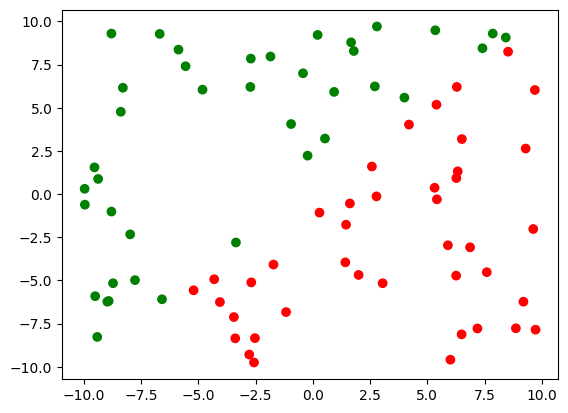

In [55]:
#draw a scatter plot for training dataset
from matplotlib import pyplot as plt
%matplotlib inline

#Plot data points and color using their class
color = ["red" if c == 1 else "green" for c in train_labels]
plt.scatter(train_attributes[:,0], train_attributes[:,1], c=color)

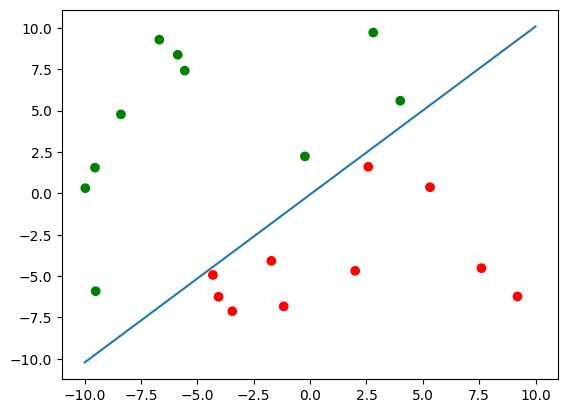

In [56]:
#draw a scatter plot of the testing dataset and the learned hyperplane
#Plot data points and color using their class
color = ["red" if c == 1 else "green" for c in test_labels]
plt.scatter(test_attributes[:,0], test_attributes[:,1], c=color)

# Create the hyperplane
slope = -w[0] / w[1]
x = np.linspace(-10, 10)
y = slope * x - b / w[1]

# Plot the hyperplane
plt.plot(x, y)